In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np                               
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dateutil.relativedelta import relativedelta
from scipy.optimize import minimize

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product
from tqdm import tqdm_notebook

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error

%matplotlib inline

plt.style.use('seaborn-v0_8-colorblind')


In [2]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(21,7))
    # plt.title("Moving average\n window size = {}".format(window))
    plt.title("Média Móvel - Latência")
    plt.plot(rolling_mean, "g", label="Tendencia Média Móvel", zorder = 2)

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Latência Média", zorder = 1)
    plt.legend(loc="upper left")
    plt.grid(True)

In [19]:
data_path = "../datasets/unloaded-res.csv"

df = pd.read_csv(data_path)

df.time = df.time.astype(int)
df.time = df.time - 1

df.head()

,time,sent,received,latency_min,latency_median,latency_75th,latency_95th,latency_99th
0,1,500,499,192,293,423,3846,6852
1,2,500,501,182,257,312,666,2641
2,3,500,500,168,253,313,799,1718
3,4,500,500,172,226,277,513,1896
4,5,500,499,167,238,295,406,1214


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12599 entries, 1 to 12599
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sent            12599 non-null  int64
 1   received        12599 non-null  int64
 2   latency_min     12599 non-null  int64
 3   latency_median  12599 non-null  int64
 4   latency_75th    12599 non-null  int64
 5   latency_95th    12599 non-null  int64
 6   latency_99th    12599 non-null  int64
dtypes: int64(7)
memory usage: 787.4 KB


In [6]:
df.describe()

,sent,received,latency_min,latency_median,latency_75th,latency_95th,latency_99th
count,12599.000000,12599.000000,12599.000000,12599.000000,12599.000000,12599.000000,12599.000000
mean,3508.486785,3508.461703,123.008890,296.695849,806.512739,5767.575284,12151.967934
std,1955.290526,1955.852225,12.774675,203.131682,1174.431806,13248.947700,20634.369070
min,480.000000,478.000000,93.000000,166.000000,185.000000,267.000000,324.000000
25%,2000.000000,2000.000000,114.000000,198.000000,293.000000,520.000000,1375.000000
50%,4000.000000,4000.000000,120.000000,220.000000,448.000000,1763.000000,4710.000000
75%,6022.000000,6010.000000,128.000000,326.000000,817.500000,5032.500000,11886.500000
max,6726.000000,7197.000000,200.000000,3923.000000,56157.000000,218962.000000,263428.000000


In [21]:
df.columns

Index(['time', 'sent', 'received', 'latency_min', 'latency_median',
       'latency_75th', 'latency_95th', 'latency_99th'],
      dtype='object')

In [23]:
latencia = df[['time', 'latency_median']]

latencia = latencia.set_index('time')

latencia.head()

,latency_median
time,
1,293
2,257
3,253
4,226
5,238


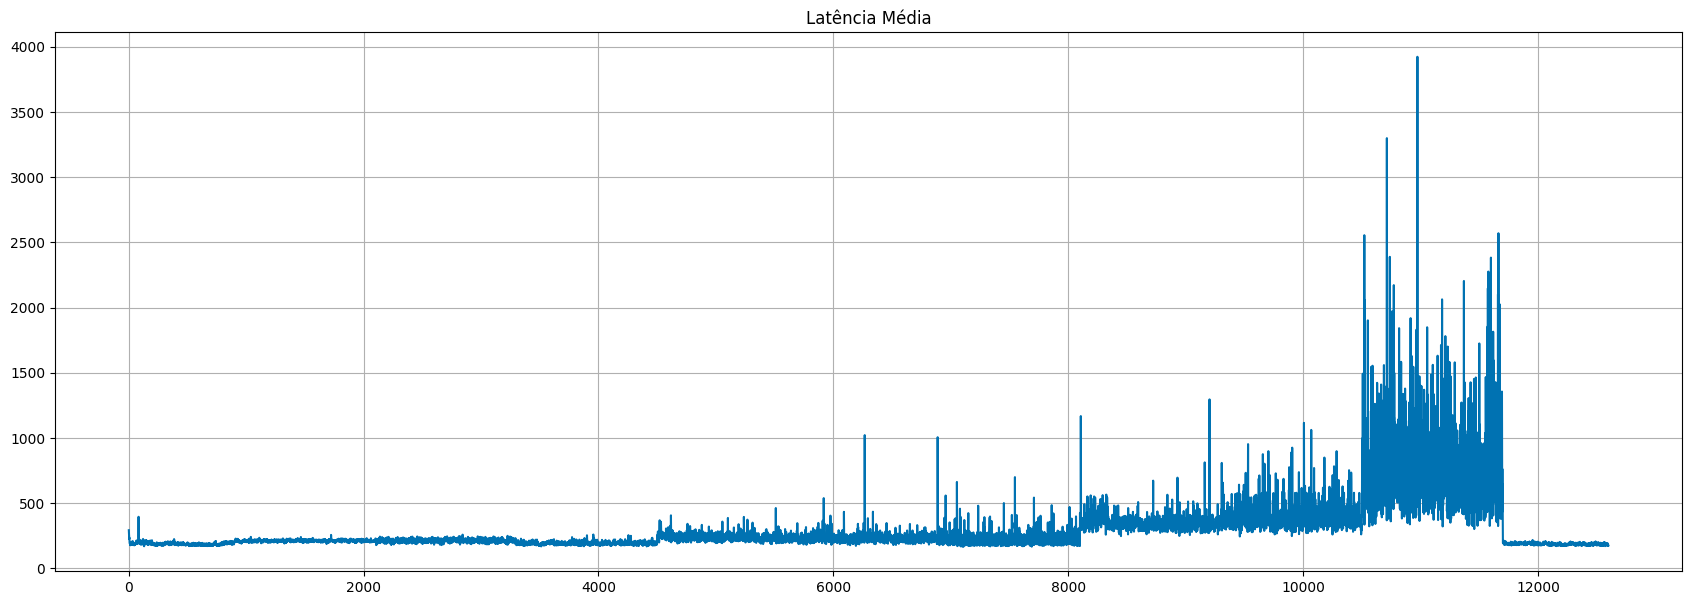

In [24]:
plt.figure(figsize=(21, 7))
plt.plot(latencia)
plt.title('Latência Média')
plt.grid(True)
plt.show()

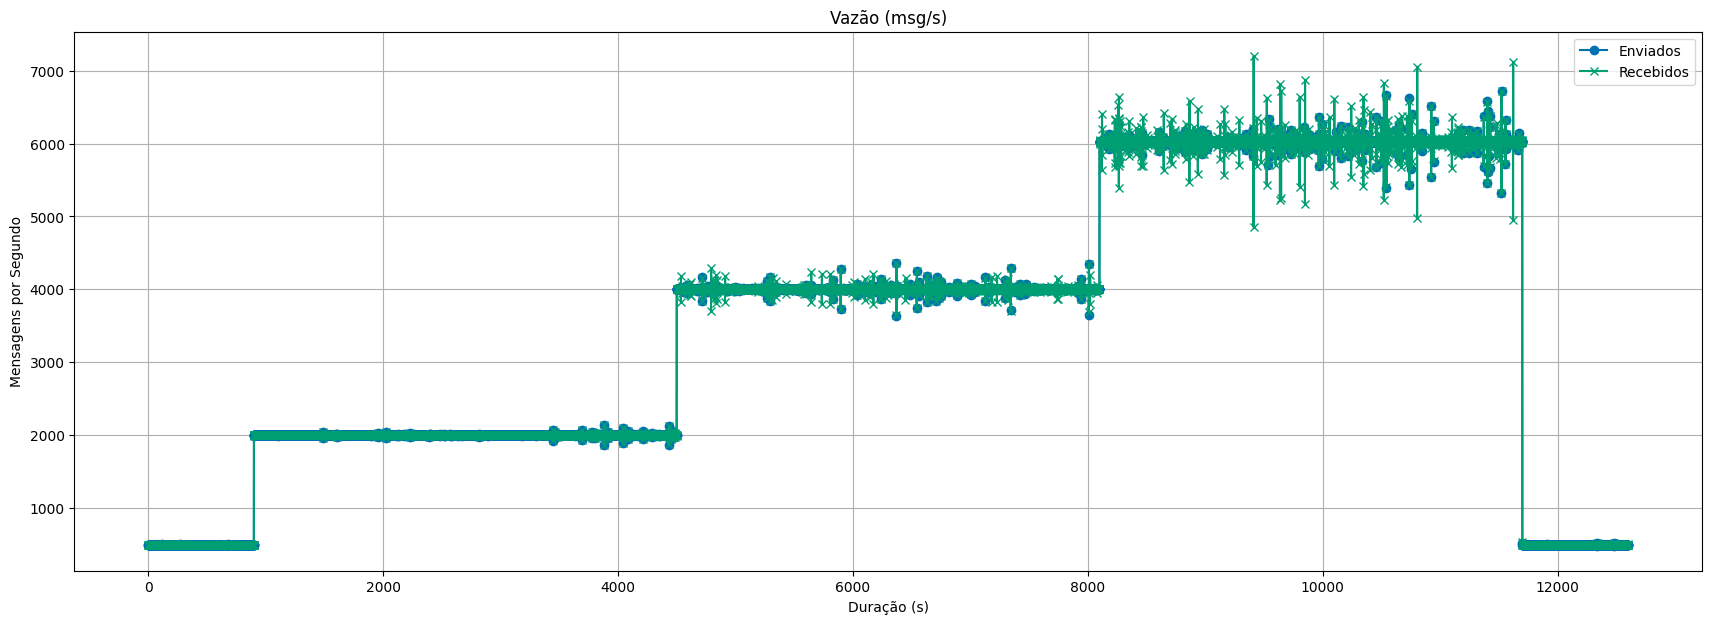

In [8]:
plt.figure(figsize=(21, 7))
plt.plot(df.sent, label = 'Enviados', marker = 'o')
plt.plot(df.received, label = 'Recebidos', marker = 'x')
plt.title('Vazão (msg/s)')
plt.xlabel('Duração (s)')
plt.ylabel("Mensagens por Segundo")
plt.grid(True)
plt.legend()
plt.show()

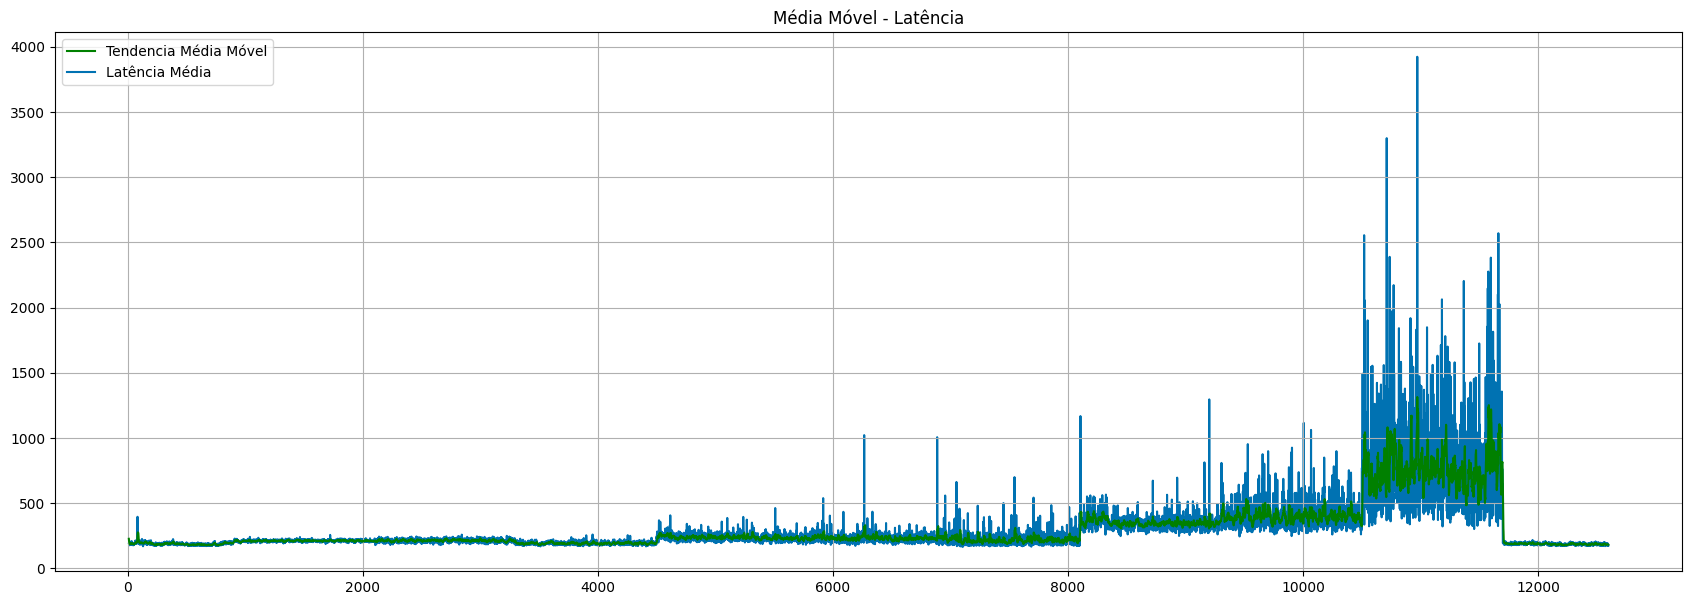

In [25]:
plotMovingAverage(latencia, 10)

In [11]:
vazao = df[['sent', 'received']]

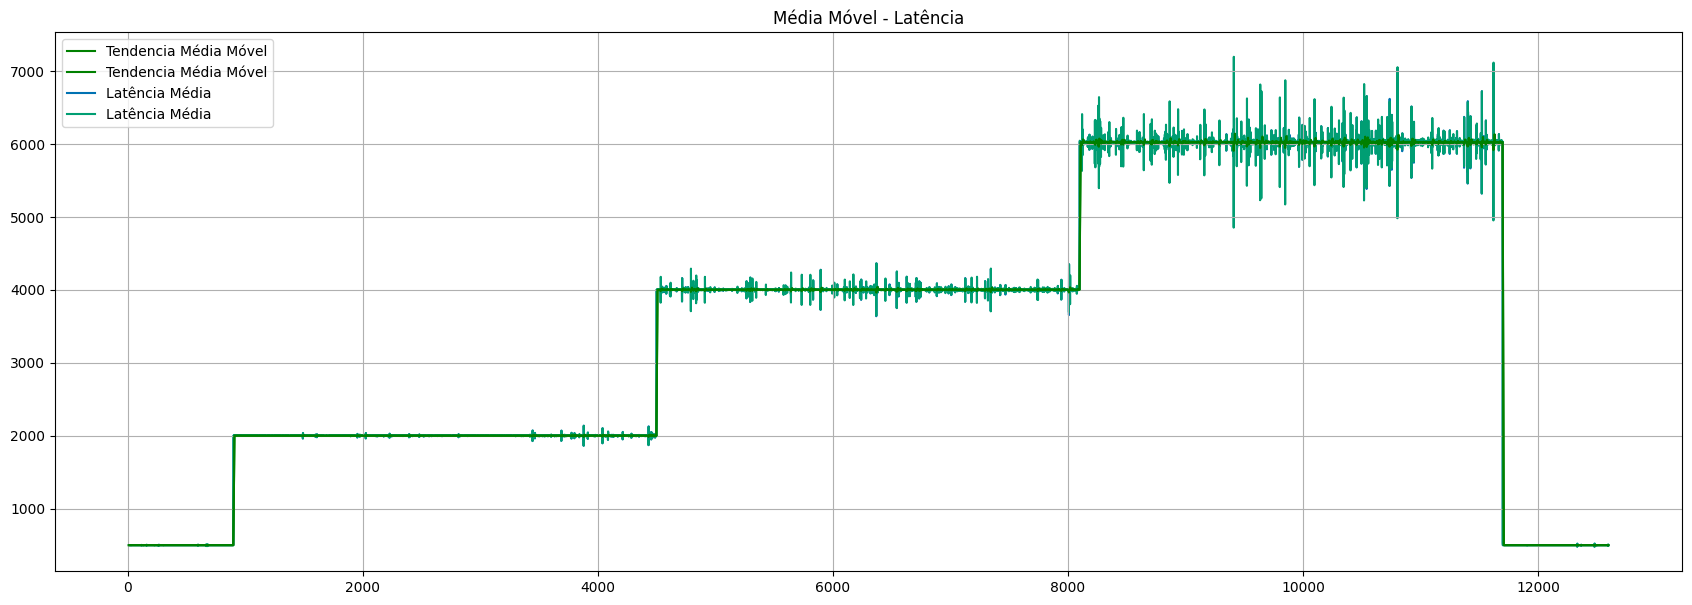

In [12]:
plotMovingAverage(vazao, 10)

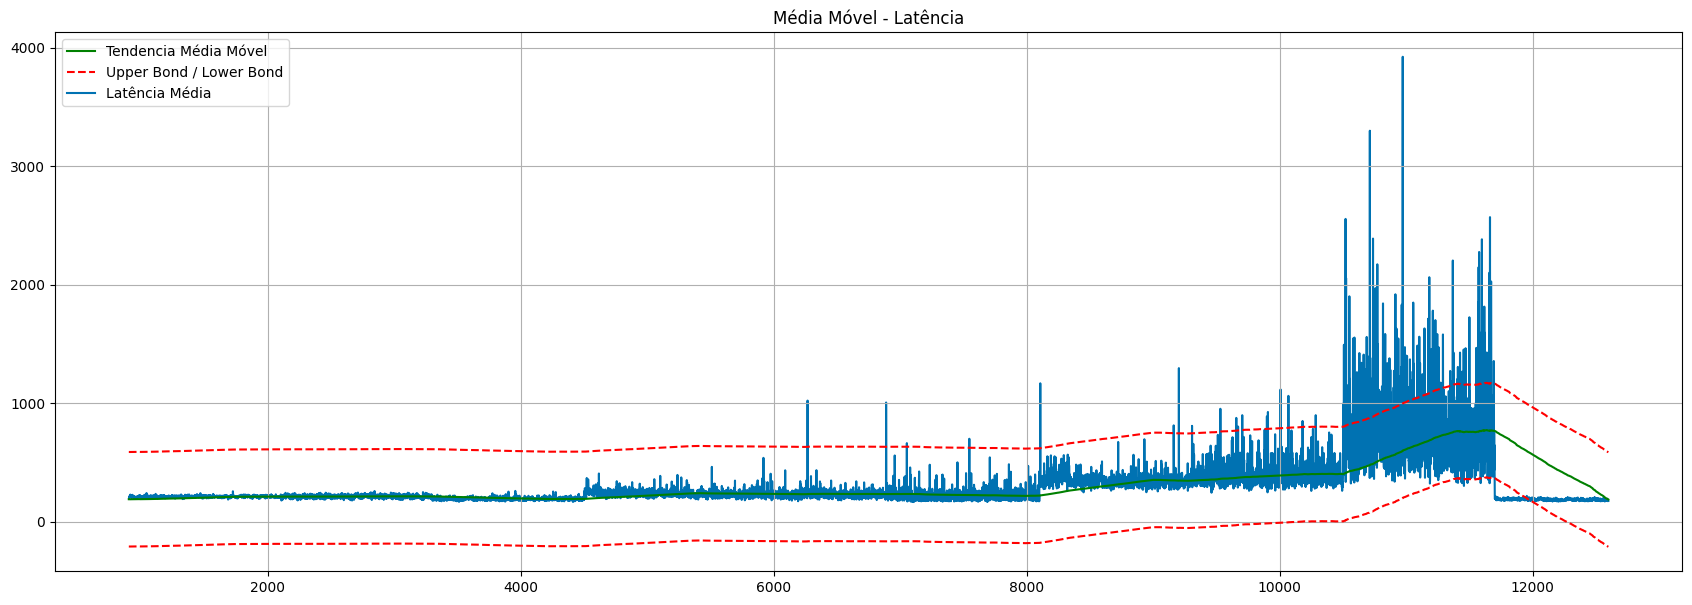

In [29]:
plotMovingAverage(latencia, 900, plot_intervals=True)

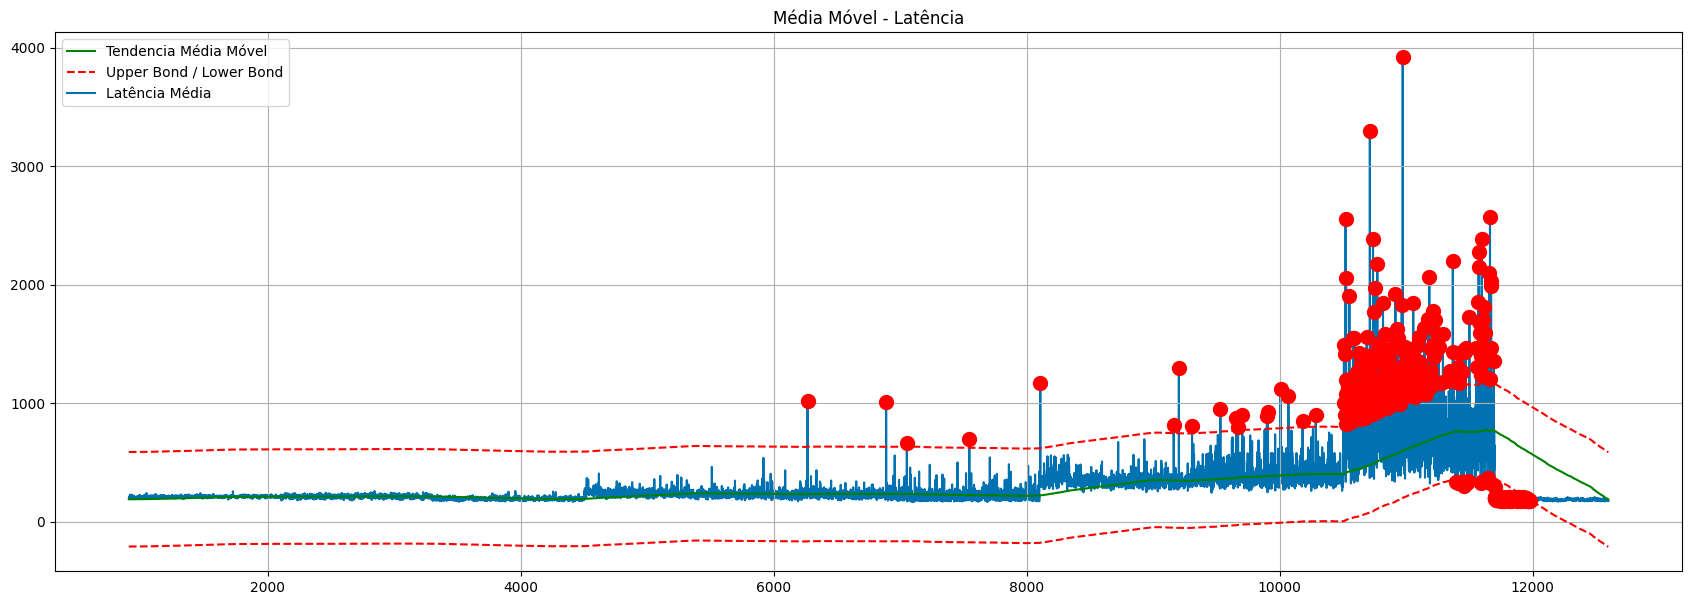

In [28]:
plotMovingAverage(latencia, 900, plot_intervals=True, plot_anomalies=True)